# Central Tendency Measures for grouped data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Mean formula
$$
\text{ Sample mean: } \overline{x} \\
\text{ Population mean or mu: } \mu \\
\text{ observations number: n} \\
\overline{x}= \mu = \frac{\sum\limits_{i=1}^nX_{i}}{n} \\
$$
### Median formula for grouped data
(Take observation in the middle for odd observations number. For even observations number, take two observations in the middle and divide by two).
$$
\text{ Median definitions: } M, Med, \tilde{x}\\
\text{ For odd observations number: } \tilde{x} = (\frac{n+1}{2})th \text{ observation } \\
\text{ For even observations number: } \tilde{x} = (\frac{\frac{n}{2}+(\frac{n}{2}+1)}{2})th \text{ observation } \\
$$
### Mode - most met observation value. 
Important: multiple mode values are possible, f.e for observation set {0,1,1,2,3,4,4,5), 1 and 4 would be both mode values

In [84]:
def getMedian(observations):
    size = len(observations)
    sortedObservations = np.sort(observations)
    if (size % 2) == 0:
        index1 = int(size/2)
        index2 = index1 - 1
        return (sortedObservations[index1]+sortedObservations[index2])/2
    else:
        medianObservation = int((size+1)/2) -1
        return sortedObservations[medianObservation]

#not used, as does not match nicely with histogram bins
# I leave it here though as example of calculation
# def getMode(observations):
#     modes = []
#     groupFrequency = {}
#     for observation in observations:
#         group = round(observation,0)
#         if group in groupFrequency:
#             groupFrequency[group] = groupFrequency[group] + 1
#         else:
#             groupFrequency[group] = 1
#     maxValue = max(groupFrequency.values()) 
#     maxGroups = [k for k, v in groupFrequency.items() if v == maxValue]
#     return maxGroups

def getModeFromHistogram(bins, binRanges):
    maxValueIndexes = np.argwhere(bins == np.amax(bins))
    modes = []
    for index in np.nditer(maxValueIndexes):
        mode = (binRanges[index]+binRanges[index+1])/2
        modes.append(mode)
    return modes

def plotHistogram(mu, sigma, n, subplot):
    data = np.random.normal(mu,sigma, n)
    subplot.title.set_text("Sample size" +str(n))
    binData = subplot.hist(data, bins=12, alpha = 0.5)
    subplot.axvline(data.mean(), color='green', linewidth=2, ymin = 0, ymax = 0.3 )
    subplot.axvline(getMedian(data), color='red',linewidth=2, ymin = 0.35, ymax = 0.7)
    modes = getModeFromHistogram(binData[0], binData[1])
    for mode in modes:
        subplot.axvline(mode, color='black', linewidth=2, ymin = 0.75, ymax = 1)
    subplot.set_ylabel('Frequency')
    subplot.set_xlabel('Value')
    subplot.legend(["Mean", "Median", "Mode"])

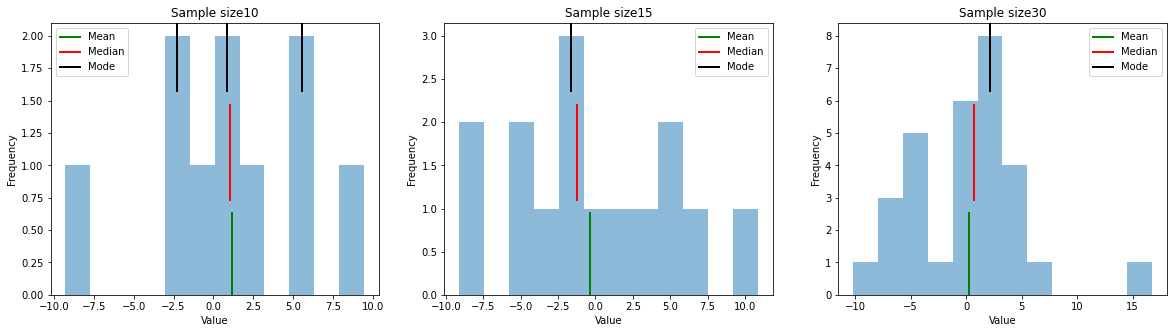

In [85]:
fig,ax=plt.subplots(1,3,figsize=(20,5))
np.random.seed(17)# So that graphic is same at next call
plotHistogram(0,5,10,ax[0])
plotHistogram(0,5,15,ax[1])
plotHistogram(0,5,30,ax[2])


Outcome: for small samples of normal distribution without outliers mean and median seem to have similar efficiency.
Mean seems to be better in most cases
Modes are not in sync with histogram bins, but it is not important for overall understanding